# Global Power Plant Project

# Problem Statement:

# Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

# Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

# Prediction :   
    
    Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import pandas as pd                               #importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Global_power_plant.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df=pd.DataFrame(data=df)
df                              #giving structural format to dataset

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA(Exploratory Data Analysis):

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(907, 27)

# Checking null values:

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can see that there are many missing values in most of the columns

<AxesSubplot:>

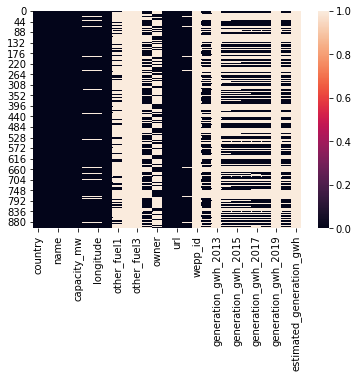

In [8]:
sns.heatmap(df.isnull())                  #almost 50-60% values are missing

In [9]:
df['latitude']=df['latitude'].fillna(np.mean(df['latitude']))
df                                                                    #filling missing values in lalitude column

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['longitude']=df['longitude'].fillna(np.mean(df['longitude'])) #we are filling missing values in longitude column also
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are mixed types of data in all the columns such as float and object

# Label Encoder

Importind Label Encoder library to change the objective or categorical data into numnerical

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df    

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


We can see that all the data types are changed 

In [14]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year          380
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

We can see that there are still few columns with missing values 

In [15]:
df['commissioning_year']=df['commissioning_year'].fillna(np.mean(df['commissioning_year']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [16]:
df['other_fuel3']=df['other_fuel3'].fillna(np.mean(df['other_fuel3']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [17]:
df['wepp_id']=df['wepp_id'].fillna(np.mean(df['wepp_id']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [18]:
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(np.mean(df['year_of_capacity_data']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [19]:
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(np.mean(df['generation_gwh_2013']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [20]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(np.mean(df['generation_gwh_2014']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,2431.823590,NaN,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,2431.823590,NaN,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,2431.823590,NaN,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,2431.823590,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,2019.0,NaN,2431.823590,NaN,NaN,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,2019.0,NaN,2431.823590,NaN,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,2019.0,NaN,2431.823590,NaN,NaN,NaN,NaN,NaN,1,NaN


In [21]:
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(np.mean(df['generation_gwh_2015']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,NaN,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,NaN,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,NaN,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,2431.823590,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,NaN,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,NaN,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,NaN,NaN,NaN,NaN,1,NaN


In [22]:
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(np.mean(df['generation_gwh_2016']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,NaN,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,NaN,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,NaN,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,2431.823590,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,NaN,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,NaN,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,NaN,NaN,NaN,1,NaN


In [23]:
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(np.mean(df['generation_gwh_2017']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,NaN,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,NaN,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,NaN,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,2431.823590,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,NaN,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,NaN,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,NaN,NaN,1,NaN


In [24]:
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(np.mean(df['generation_gwh_2018']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,2431.823590,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN


In [25]:
df['generation_gwh_2019']=df['generation_gwh_2019'].fillna(np.mean(df['generation_gwh_2019']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,2431.823590,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN


In [26]:
df['estimated_generation_gwh']=df['estimated_generation_gwh'].fillna(np.mean(df['estimated_generation_gwh']))
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,2019.0,NaN,2431.823590,0.994875,233.596650,865.400000,686.500000,NaN,0,NaN
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN


All the missing values has been filled with mean values of each column respectively.

In [27]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

We will drop other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019 and estimated_generation_gwh columns
as there is no value in these columns and we can not replace those missing values with any other values

In [28]:
df.drop('other_fuel3',axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN


In [29]:
df.drop('wepp_id',axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN


In [30]:
df.drop('generation_gwh_2013',axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,0,NaN


In [31]:
df.drop('generation_gwh_2019',axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1,NaN
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1,NaN
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1,NaN
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0,NaN
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,NaN


In [32]:
df.drop('estimated_generation_gwh',axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


In [33]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,...,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,...,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,...,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,...,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,...,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,...,22,58,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,...,77,22,0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,...,21,260,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,...,59,82,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


In [34]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

as we can see that there is no missing data in our dataset now

In [35]:
df.dtypes

country                     int32
country_long                int32
name                        int32
gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                 int32
other_fuel2                 int32
commissioning_year        float64
owner                       int32
source                      int32
url                         int32
geolocation_source          int32
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source      int32
dtype: object

# Data Visualization:

<AxesSubplot:xlabel='country', ylabel='Density'>

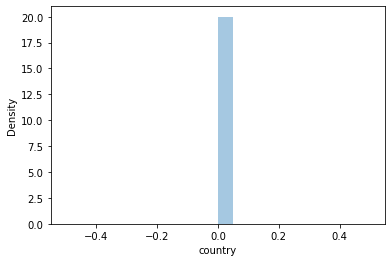

In [36]:
sns.distplot(df['country'],kde=True,bins=20)

there is only one country we can see and that is INDIA 

<AxesSubplot:xlabel='country_long', ylabel='Density'>

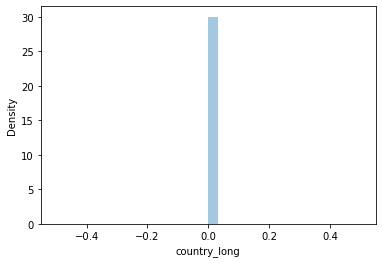

In [37]:
sns.distplot(df['country_long'],kde=True)

Country and country long both are different columns but the data in these column are same and only INDIA

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

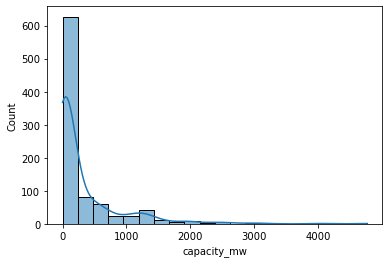

In [38]:
sns.histplot(x='capacity_mw',kde=True,bins=20,data=df)

As we can see that Capacity_mv column data is not normally distributed and highly skewed

<AxesSubplot:xlabel='latitude', ylabel='Count'>

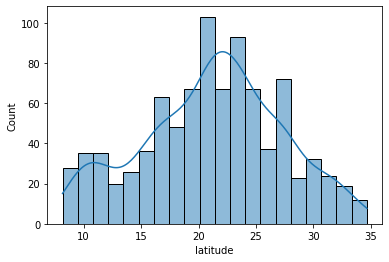

In [39]:
sns.histplot(x='latitude',kde=True,bins=20,data=df)

data is not normally skewed

<AxesSubplot:xlabel='longitude', ylabel='Count'>

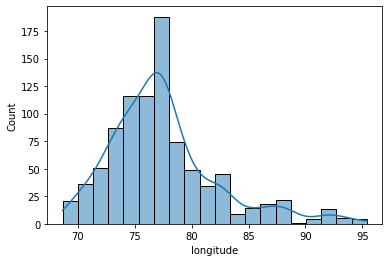

In [40]:
sns.histplot(x='longitude',kde=True,bins=20,data=df)

Datab is not distributed normally

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

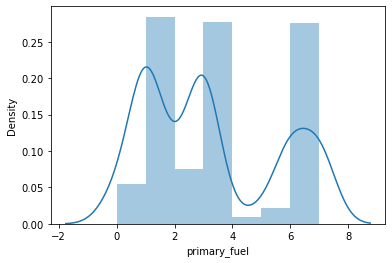

In [41]:
sns.distplot(df['primary_fuel'],kde=True)

data is not distributed normally

<AxesSubplot:xlabel='other_fuel1', ylabel='Density'>

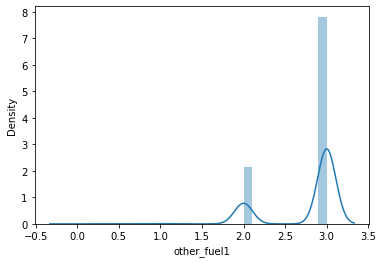

In [42]:
sns.distplot(df['other_fuel1'],kde=True)

Datab is not distributed normally

<AxesSubplot:xlabel='other_fuel2', ylabel='Density'>

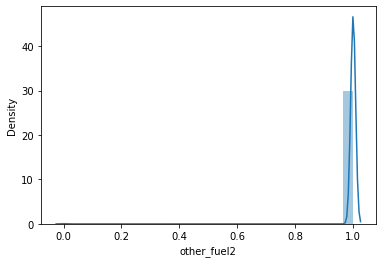

In [43]:
sns.distplot(df['other_fuel2'],kde=True)

Data is not distributed normally

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

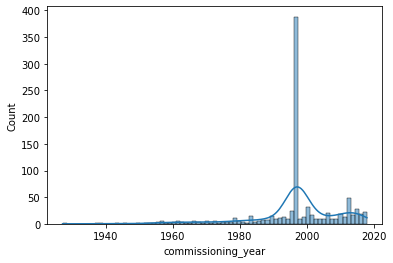

In [44]:
sns.histplot(x='commissioning_year',kde=True,data=df)

data is highly skewed 

<AxesSubplot:xlabel='owner', ylabel='Density'>

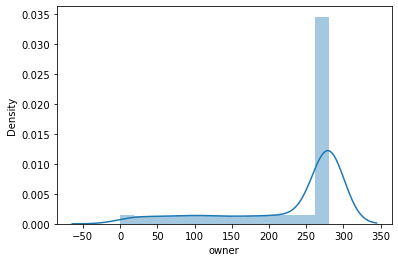

In [45]:
sns.distplot(df['owner'],kde=True)

data is not distributed normally

<AxesSubplot:xlabel='source', ylabel='Density'>

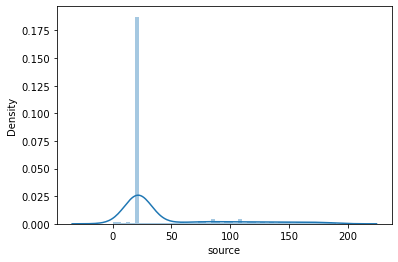

In [46]:
sns.distplot(df['source'],kde=True)

data is not distributed normally

<AxesSubplot:xlabel='url', ylabel='Density'>

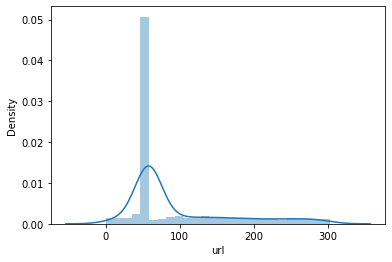

In [47]:
sns.distplot(df['url'],kde=True)

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

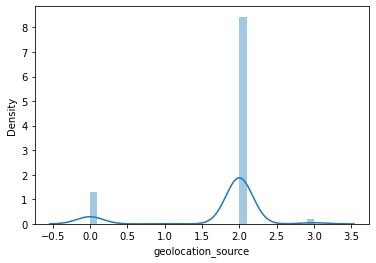

In [48]:
sns.distplot(df['geolocation_source'],kde=True)

data is not distributed normally

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Count'>

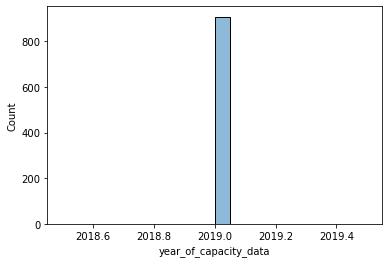

In [49]:
sns.histplot(x='year_of_capacity_data',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Count'>

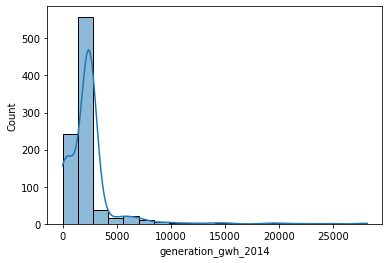

In [50]:
sns.histplot(x='generation_gwh_2014',kde=True,bins=20,data=df)

datab is highly skewed at righ and not distributed normally

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Count'>

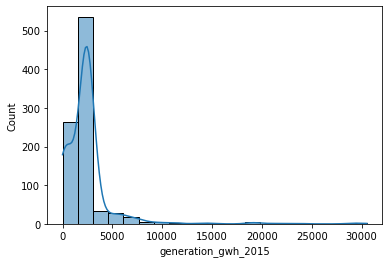

In [51]:
sns.histplot(x='generation_gwh_2015',kde=True,bins=20,data=df)

data is highly skewed at right side and not distributed normally

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Count'>

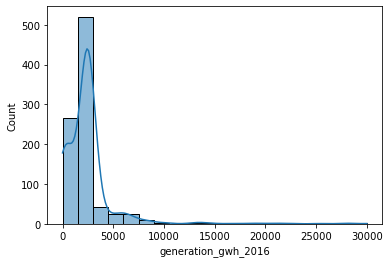

In [52]:
sns.histplot(x='generation_gwh_2016',kde=True,bins=20,data=df)

data is highly skewed at right and not distributed normally

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Count'>

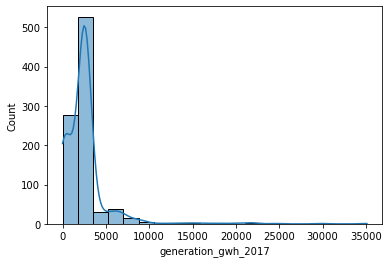

In [53]:
sns.histplot(x='generation_gwh_2017',kde=True,bins=20,data=df)

Data is not distributed normally, it is higly skewed at right

<AxesSubplot:xlabel='generation_data_source', ylabel='Density'>

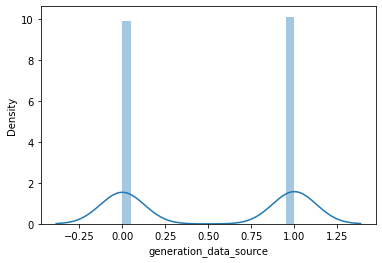

In [54]:
sns.distplot(df['generation_data_source'],kde=True,bins=20)

# Describing dataset

In [55]:
df.shape

(907, 22)

In [56]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.0,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,...,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,0.0,0.0,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,2.777288,0.998897,...,43.847850,94.469680,1.754135,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.504961
std,0.0,0.0,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,0.429348,0.033204,...,44.642818,70.381222,0.700183,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.500251
min,0.0,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,3.000000,1.000000,...,22.000000,58.000000,2.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340,0.000000
50%,0.0,0.0,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,3.000000,1.000000,...,22.000000,58.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
75%,0.0,0.0,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,3.000000,1.000000,...,29.500000,115.500000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
max,0.0,0.0,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,3.000000,1.000000,...,190.000000,303.000000,3.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


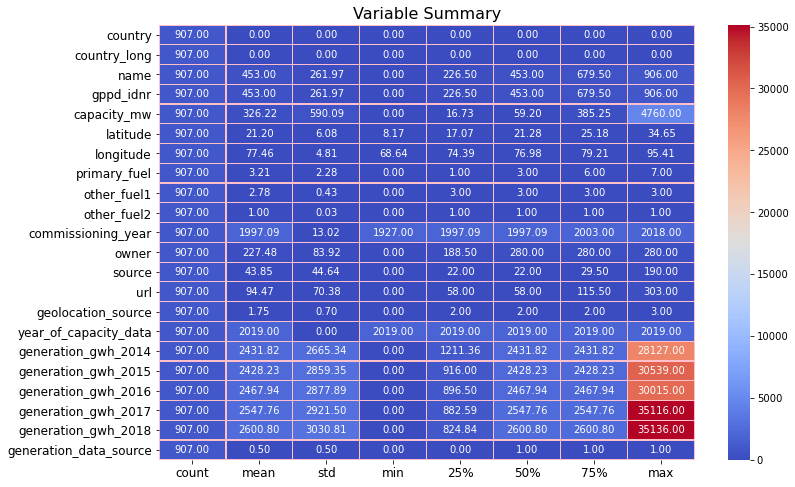

In [57]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe().transpose(),annot=True,fmt='0.2f',linewidth=0.2,cmap='coolwarm',linecolor='pink')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Variable Summary',fontsize=16)
plt.show()

# Outcome of describe of datasets:
From above we are determining mean, standard deviation, min. and max. value of each column, which will furthur help us in data cleaning.

Total number of rows and columns in dataset:

    1. 907 rows

    2. 22 columns
Country and country_long:   Both are categorical data

name:

    1.Mean=453

    2.std=261.97

    3.max_value=906.0

    4.min_value=0.00

gppd_idnr:

    1.Mean=453.0

    2.std=261.97

    3.max_value=906.0

    4.min_value=0.00
Capacity_mw:

    1.Mean=326.22

    2.std=590.09

    3.max_value=4760.0

    4.min_value=0.00
latitude:

    1.Mean=21.20

    2.std=6.08

    3.max_value=34.65

    4.min_value=8.17
longitude:

    1.Mean=77.46

    2.std=4.81

    3.max_value=95.41

    4.min_value=68.64
primary_fuel:

    1.Mean=3.21

    2.std=2.28

    3.max_value=7.0

    4.min_value=0
Other_fuel1:

    1.Mean=2.78

    2.std=0.43

    3.max_value=3.00

    4.min_value=0.00
Other_fuel2:

     1.Mean=1

     2.std=0.03

     3.max_value=1

     4.min_value=0
Commisioning year:

     1.Mean=1997.09

     2.std=13.02

     3.max_value=2018

     4.min_value=1927
Owner:
     
     1.Mean=227.48

     2.std=83.92

     3.max_value=280.0

     4.min_value=0
        
Source:
    
     1.Mean=43.85

     2.std=44.64

     3.max_value=190

     4.min_value=0

Url:
    
     1.Mean=94.47

     2.std=70.38

     3.max_value=303

     4.min_value=0
    
geolocation source:
    
     1.Mean=1.75

     2.std=0.70

     3.max_value=3

     4.min_value=0
    
year of capacity data:
    
     1.Mean=2019

     2.std=0

     3.max_value=2019

     4.min_value=2019
    
generation_gwh_2014:
    
     1.Mean=2431.82

     2.std=2665.34

     3.max_value=28127.0

     4.min_value=0
    
generation_gwh_2015:
    
     1.Mean=2428.23

     2.std=2859.35

     3.max_value=30539.0

     4.min_value=0
    
generation_gwh_2016:
    
     1.Mean=2467.94

     2.std=2877.89

     3.max_value=30015.0

     4.min_value=0
    
generation_gwh_2017:
    
     1.Mean=2547.76

     2.std=2921.50

     3.max_value=35116.0

     4.min_value=0
    
generation_gwh_2018:
    
     1.Mean=2680.0

     2.std=3030.81

     3.max_value=35136.0

     4.min_value=0
    
generation_data_source:
    
     1.Mean=0.50

     2.std=0.50

     3.max_value=1

     4.min_value=0

# Checking coreelation:

In [58]:
df.corr()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.332205,0.060240,-0.135247,0.020279,0.040753,-0.035180,-0.045426,...,-1.463951e-02,4.191727e-02,4.588220e-02,NaN,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02,-5.861880e-03
gppd_idnr,NaN,NaN,0.332205,1.000000,-0.335742,-0.105728,-0.377812,0.609180,0.367177,0.001650,...,4.163838e-01,5.970803e-01,-4.104426e-01,NaN,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,7.348321e-01
capacity_mw,NaN,NaN,0.060240,-0.335742,1.000000,0.050984,0.195882,-0.380395,-0.606289,0.003731,...,-2.421218e-01,-2.438304e-01,1.834187e-01,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,-4.958331e-01
latitude,NaN,NaN,-0.135247,-0.105728,0.050984,1.000000,0.036362,-0.010204,-0.032790,0.032885,...,5.592656e-02,-1.310376e-01,-1.782135e-01,NaN,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02,-8.690977e-02
longitude,NaN,NaN,0.020279,-0.377812,0.195882,0.036362,1.000000,-0.347948,-0.275689,0.005545,...,-2.393334e-01,-3.029847e-01,2.440420e-01,NaN,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02,-4.098033e-01
primary_fuel,NaN,NaN,0.040753,0.609180,-0.380395,-0.010204,-0.347948,1.000000,0.476410,0.032156,...,5.361263e-02,5.898861e-01,-4.202632e-01,NaN,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,4.823393e-01
other_fuel1,NaN,NaN,-0.035180,0.367177,-0.606289,-0.032790,-0.275689,0.476410,1.000000,0.215024,...,2.541384e-01,2.690843e-01,-1.823473e-01,NaN,-3.383329e-01,-3.343364e-01,-3.517276e-01,-3.641263e-01,-3.655638e-01,5.241834e-01
other_fuel2,NaN,NaN,-0.045426,0.001650,0.003731,0.032885,0.005545,0.032156,0.215024,1.000000,...,1.626794e-02,1.722466e-02,-1.167244e-02,NaN,4.458776e-03,4.638852e-03,1.012930e-02,1.134474e-02,1.512784e-02,3.355409e-02


In [59]:
df.drop('country',inplace=True,axis=1)

In [60]:
df

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,...,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,0,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,...,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,0,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,...,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,0,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,...,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,...,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,902,491,1600.0,16.2949,77.3568,1,2,1,2016.000000,...,22,58,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,0,903,822,3.0,12.8932,78.1654,6,3,1,1997.091082,...,77,22,0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,0,904,891,25.5,15.2758,75.5811,7,3,1,1997.091082,...,21,260,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,0,905,539,80.0,24.3500,73.7477,1,3,1,1997.091082,...,59,82,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


In [61]:
df.drop('country_long',inplace=True,axis=1)

In [62]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,903,822,3.0,12.8932,78.1654,6,3,1,1997.091082,114,77,22,0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,904,891,25.5,15.2758,75.5811,7,3,1,1997.091082,280,21,260,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,905,539,80.0,24.3500,73.7477,1,3,1,1997.091082,91,59,82,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


In [63]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [64]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,903,822,3.0,12.8932,78.1654,6,3,1,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,904,891,25.5,15.2758,75.5811,7,3,1,1997.091082,280,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,905,539,80.0,24.3500,73.7477,1,3,1,1997.091082,91,59,82,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


In [65]:
df.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
name,1.000000,0.332205,0.060240,-0.135247,0.020279,0.040753,-0.035180,-0.045426,-0.043569,1.179542e-01,-1.463951e-02,4.191727e-02,4.588220e-02,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02,-5.861880e-03
gppd_idnr,0.332205,1.000000,-0.335742,-0.105728,-0.377812,0.609180,0.367177,0.001650,0.044059,-6.020381e-01,4.163838e-01,5.970803e-01,-4.104426e-01,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,7.348321e-01
capacity_mw,0.060240,-0.335742,1.000000,0.050984,0.195882,-0.380395,-0.606289,0.003731,0.274292,3.043221e-01,-2.421218e-01,-2.438304e-01,1.834187e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,-4.958331e-01
latitude,-0.135247,-0.105728,0.050984,1.000000,0.036362,-0.010204,-0.032790,0.032885,0.102069,7.220683e-03,5.592656e-02,-1.310376e-01,-1.782135e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02,-8.690977e-02
longitude,0.020279,-0.377812,0.195882,0.036362,1.000000,-0.347948,-0.275689,0.005545,0.092331,2.784428e-01,-2.393334e-01,-3.029847e-01,2.440420e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02,-4.098033e-01
primary_fuel,0.040753,0.609180,-0.380395,-0.010204,-0.347948,1.000000,0.476410,0.032156,-0.126650,-2.603893e-01,5.361263e-02,5.898861e-01,-4.202632e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,4.823393e-01
other_fuel1,-0.035180,0.367177,-0.606289,-0.032790,-0.275689,0.476410,1.000000,0.215024,-0.322443,-3.249991e-01,2.541384e-01,2.690843e-01,-1.823473e-01,-3.383329e-01,-3.343364e-01,-3.517276e-01,-3.641263e-01,-3.655638e-01,5.241834e-01
other_fuel2,-0.045426,0.001650,0.003731,0.032885,0.005545,0.032156,0.215024,1.000000,-0.004875,-2.080388e-02,1.626794e-02,1.722466e-02,-1.167244e-02,4.458776e-03,4.638852e-03,1.012930e-02,1.134474e-02,1.512784e-02,3.355409e-02
commissioning_year,-0.043569,0.044059,0.274292,0.102069,0.092331,-0.126650,-0.322443,-0.004875,1.000000,-2.137372e-02,2.152776e-02,1.091016e-02,6.055371e-04,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01,-9.951977e-02
owner,0.117954,-0.602038,0.304322,0.007221,0.278443,-0.260389,-0.324999,-0.020804,-0.021374,1.000000e+00,-2.435874e-01,-1.906723e-01,3.982118e-01,-2.743044e-16,-9.981670e-17,-2.334202e-17,8.369181e-17,-6.497742e-17,-6.200103e-01


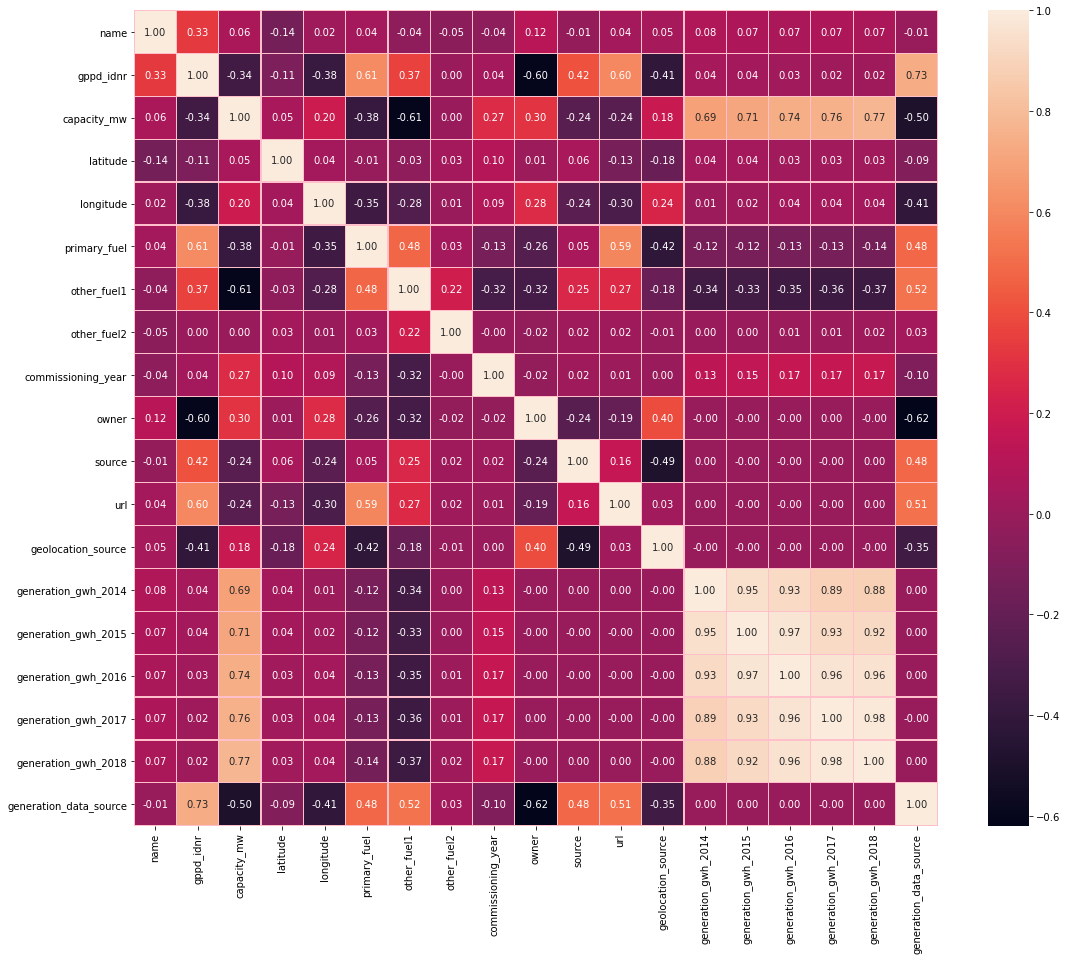

In [66]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,linecolor='pink',fmt='0.2f')
plt.show()

# Outliers checking

<AxesSubplot:>

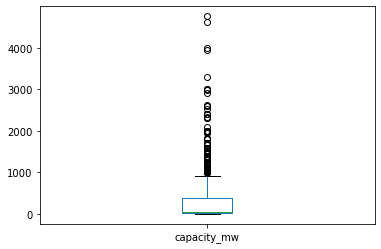

In [67]:
df['capacity_mw'].plot.box()                     #there are many outliers in this column

<AxesSubplot:>

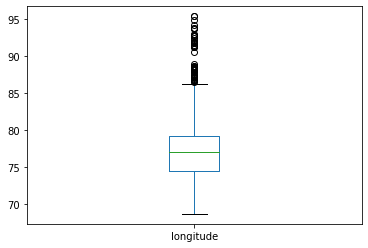

In [68]:
df['longitude'].plot.box()            #we can see that there are many outliers in this column

<AxesSubplot:>

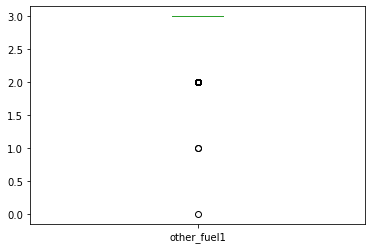

In [69]:
df['other_fuel1'].plot.box()                   #there are few outliers present in this column

<AxesSubplot:>

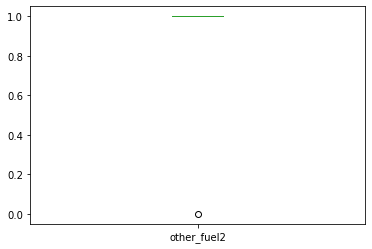

In [70]:
df['other_fuel2'].plot.box()               #there are few outliers present in this column

<AxesSubplot:>

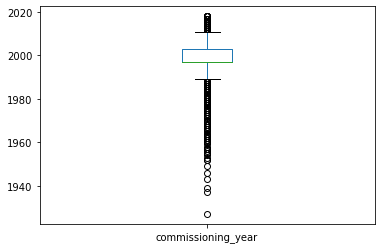

In [71]:
df['commissioning_year'].plot.box()              #there are many ouitliers present in this column

<AxesSubplot:>

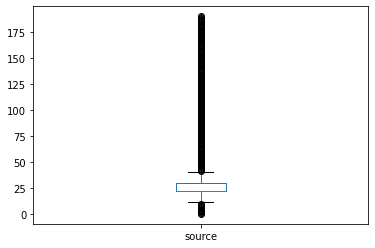

In [72]:
df['source'].plot.box()                      #there are many ouitliers present in this column

<AxesSubplot:>

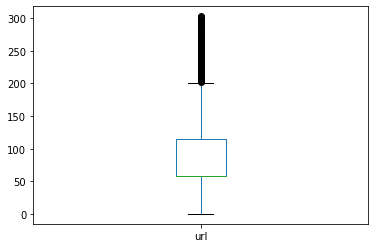

In [73]:
df['url'].plot.box()           #there are many ouitliers present in this column

<AxesSubplot:>

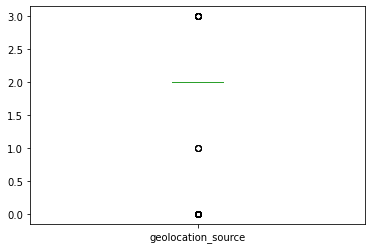

In [74]:
df['geolocation_source'].plot.box()                   #there are few outliers present in this column

<AxesSubplot:>

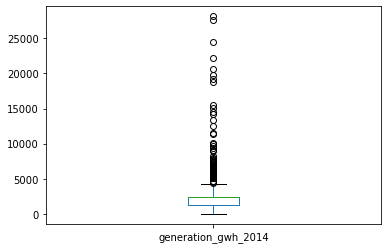

In [75]:
df['generation_gwh_2014'].plot.box()              #there are many outliers present in this column

<AxesSubplot:>

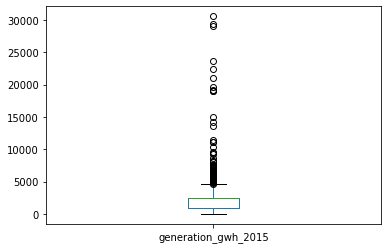

In [76]:
df['generation_gwh_2015'].plot.box()              #there are many outliers present in this column

<AxesSubplot:>

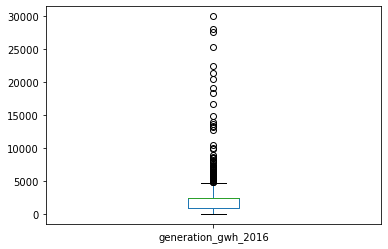

In [77]:
df['generation_gwh_2016'].plot.box()              #there are many outliers present in this column

<AxesSubplot:>

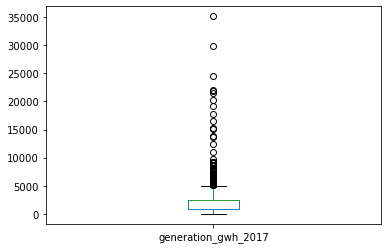

In [78]:
df['generation_gwh_2017'].plot.box()              #there are many outliers present in this column

<AxesSubplot:>

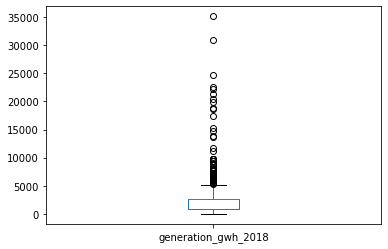

In [79]:
df['generation_gwh_2018'].plot.box()              #there are many outliers present in this column

# Removing outliers:

In [80]:
#importing zscore from stats

from scipy.stats import zscore

In [81]:
df.shape

(907, 19)

In [82]:
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
        299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
        360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
        454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494,
        494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592, 601,
        621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657,
        657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709, 721,
        721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
        726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808, 808,
        808, 808, 808, 808, 811, 811, 813, 817, 818, 832, 847, 848, 870,
        871, 879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64),
 array([ 2, 14, 15, 16, 17, 10, 10,  2, 13, 14, 15, 16, 17,  2, 13,  4,  4,
        10,  2, 13, 14, 15, 16, 17,  8,  4, 10, 

In [83]:
df_new=df[(z<3).all(axis=1)]
df_new

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,903,822,3.0,12.8932,78.1654,6,3,1,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,904,891,25.5,15.2758,75.5811,7,3,1,1997.091082,280,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,905,539,80.0,24.3500,73.7477,1,3,1,1997.091082,91,59,82,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


In [84]:
df_new.shape

(831, 19)

# Data loss calculation:

In [85]:
Data_loss=((907-831)/907)*100
Data_loss

8.379272326350605

# Separating Data in x and y

In [86]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [87]:
x

,name,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,1,519,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,2,853,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,3,0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,903,822,12.8932,78.1654,6,3,1,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,904,891,15.2758,75.5811,7,3,1,1997.091082,280,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,905,539,24.3500,73.7477,1,3,1,1997.091082,91,59,82,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


In [88]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

In [89]:
x.skew()

name                       0.000000
gppd_idnr                  0.000000
latitude                  -0.149698
longitude                  1.141881
primary_fuel               0.472251
other_fuel1               -1.626786
other_fuel2              -30.116441
commissioning_year        -1.399359
owner                     -1.373940
source                     1.827373
url                        1.510537
geolocation_source        -1.920302
generation_gwh_2014        5.035446
generation_gwh_2015        5.364134
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source    -0.019880
dtype: float64

# Transforming Data to remove skewness

In [90]:
from sklearn.preprocessing import power_transform

In [91]:
x=power_transform(x,method='yeo-johnson')
x

array([[-2.16561515,  0.79063305,  1.1594364 , ...,  0.31292509,
         0.32193752,  0.99012592],
       [-2.14663031,  0.33133539,  0.57903232, ...,  0.31292509,
         0.32193752,  0.99012592],
       [-2.13033981,  1.39746613,  0.09991208, ...,  0.31292509,
         0.32193752,  0.99012592],
       ...,
       [ 1.54842588,  1.51018594, -0.98053644, ...,  0.31292509,
         0.32193752,  0.99012592],
       [ 1.55136078,  0.39991495,  0.50893808, ...,  0.31292509,
         0.32193752,  0.99012592],
       [ 1.55429474,  1.4658612 , -1.81390048, ...,  0.31292509,
         0.32193752,  0.99012592]])

# Applying standard scaler

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.16561515,  0.79063305,  1.1594364 , ...,  0.31292509,
         0.32193752,  0.99012592],
       [-2.14663031,  0.33133539,  0.57903232, ...,  0.31292509,
         0.32193752,  0.99012592],
       [-2.13033981,  1.39746613,  0.09991208, ...,  0.31292509,
         0.32193752,  0.99012592],
       ...,
       [ 1.54842588,  1.51018594, -0.98053644, ...,  0.31292509,
         0.32193752,  0.99012592],
       [ 1.55136078,  0.39991495,  0.50893808, ...,  0.31292509,
         0.32193752,  0.99012592],
       [ 1.55429474,  1.4658612 , -1.81390048, ...,  0.31292509,
         0.32193752,  0.99012592]])

In [96]:
x.shape

(907, 18)

In [97]:
y.shape

(907,)

# Model Building:

# Finding best random state

In [104]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [105]:
maxAccu=0
maxRS=0

for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr_train=lr.predict(x_train)
    predlr_test=lr.predict(x_test)
    acc=r2_score(y_test,predlr_test)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Best accuracy score is: ', maxAccu, 'at random state: ', maxRS)

#finding best random state with best and high accuracy

Best accuracy score is:  0.856735953193105 at random state:  436


In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=436)

# Splitting the data into train and test using best random state

# Linear Regression:

In [107]:
lr=LinearRegression()
lr.fit(x_train,y_train)                             # Training the Linear Regression Model
lr_pred=lr.predict(x_test)
lr_pred                                     # The Linear Regression Model is predicting values based on training
print(r2_score(y_test,lr_pred))             # The R2 Accuracy Score of Linear Regression Model

0.856735953193105


In [108]:
print(mean_absolute_error(y_test,lr_pred))
print(mean_squared_error(y_test,lr_pred))
print(np.sqrt(mean_squared_error(y_test,lr_pred)))

# Evolution Matrix of Linear Regression Model

154.50121150297983
52476.28493957285
229.07702839781393


# Random Forest Regressor:

In [109]:
from sklearn.ensemble import RandomForestRegressor # Importing Random Forest Regressor Model from sklearn library

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)                           # Training the Random Forest Regressor Model
rfr_pred=rfr.predict(x_test)
rfr_pred                                         # The Random Forest Regressor Model giving predictions based on training 
print(r2_score(y_test,rfr_pred))                 # The R2 Accuracy Score of Random Forest Regressor Model

0.9134211415416428


In [110]:
print(mean_absolute_error(y_test,rfr_pred))
print(mean_squared_error(y_test,rfr_pred))
print(np.sqrt(mean_squared_error(y_test,rfr_pred)))

# Evolution Matrix of Random Forest Regressor Model

102.48230390109892
31713.028826608865
178.0815229792492


# Extra Trees Regressor:

In [111]:
from sklearn.ensemble import ExtraTreesRegressor     # Importing Extra Trees Regressor Model from sklearn Library

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)                              # Training the Extra Trees Regressor Model
etr_pred=etr.predict(x_test)
etr_pred                                          # The Extra Trees Regressor Model giving predictions based on training
print(r2_score(y_test,etr_pred))                  # The R2 Accuracy Score of Extra Trees Regressor Model

0.9009106287707147


In [112]:
print(mean_absolute_error(y_test,etr_pred))
print(mean_squared_error(y_test,etr_pred))
print(np.sqrt(mean_squared_error(y_test,etr_pred)))

# The Evolution Matrix of Extra Trees Regressor Model

109.23504868131867
36295.51304047648
190.51381325372836


# Cross Validation:

In [113]:
from sklearn.model_selection import cross_val_score

# Importing cross_val_score from sklearn Library to perform Cross Validation

In [114]:
scr1=cross_val_score(lr, x, y, cv=5)
scr1

print("The Cross Validation Score of Linear Regression Model is: ",scr1.mean())

# The Cross Validation Score of Linear Regression Model is: 0.7615041446641122

The Cross Validation Score of Linear Regression Model is:  0.7615041446641122


In [115]:
scr2=cross_val_score(rfr, x, y, cv=5)
scr2

print("The Cross Validation Score of Random Forest Regression Model is: ",scr2.mean())

# The Cross Validation Score of Random Forest Regression Model is:  0.845518851834675

The Cross Validation Score of Random Forest Regression Model is:  0.845518851834675


In [116]:
scr3=cross_val_score(etr, x, y, cv=5)
scr3

print("The Cross Validation Score of Extra Trees Regression Model is: ",scr3.mean())

# The Cross Validation Score of Extra Trees Regression Model is:  0.845518851834675

The Cross Validation Score of Extra Trees Regression Model is:  0.8616753338330201


# We are taking extra tree regressor as it is giving us high accuracy and high cross validation score and the difference between both is minimum

# Hyper Parameter Tuning:

In [118]:
from sklearn.model_selection import GridSearchCV

# Importing GridSearchCV from sklearn Library to perform Hyper Parameter Tuning

In [125]:
parameter={"max_depth":np.arange(2,10), 
           "min_samples_split":np.arange(2,10),
          "min_samples_leaf":np.arange(2,10),
          "max_features":['auto', 'sqrt']}

# Taking all the Parameters to test best Accuracy possible

In [126]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [127]:
GCV.fit(x_train,y_train)          # Training the GridSearchCV model to find best parameter

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [128]:
GCV.best_params_                 #Printing the best parameters found by GridSearchCV

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [129]:
GCV_pred=GCV.best_estimator_.predict(x_test)   #predicting with best parameters

In [130]:
print(r2_score(y_test,GCV_pred))                  #checking final accuracy

0.9134539759536202


# Final accuracy for Capacity_mw is 91.3%

# Saving the model

In [149]:
import joblib
joblib.dump(GCV.best_estimator_,"Global_power_plant_capacity_mw.pkl")

['Global_power_plant_capacity_mw.pkl']

# Now conditon with label=primary_fuel

In [132]:
features=df.drop('primary_fuel',axis=1)
target=df['primary_fuel']

In [133]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,657,2.5,28.1839,73.2407,6,3,1,2011.000000,229,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,1,519,98.0,24.7663,74.6090,1,3,1,1997.091082,258,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,2,853,39.2,21.9038,69.3732,7,3,1,1997.091082,2,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,3,0,135.0,23.8712,91.3602,2,3,1,2004.000000,280,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1,1800.0,21.9603,82.4091,1,2,1,2015.000000,280,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2,1,2016.000000,280,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,903,822,3.0,12.8932,78.1654,6,3,1,1997.091082,114,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,904,891,25.5,15.2758,75.5811,7,3,1,1997.091082,280,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,905,539,80.0,24.3500,73.7477,1,3,1,1997.091082,91,59,82,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


# Finding Best random state

In [134]:
maxAccu1=0
maxRS1=0

for i in range(1,500):
    x_train1,x_test1,y_train1,y_test1=train_test_split(features,target,test_size=0.20,random_state=i)
    lr1=LinearRegression()
    lr1.fit(x_train1,y_train1)
    predlr_train1=lr1.predict(x_train1)
    predlr_test1=lr1.predict(x_test1)
    acc1=r2_score(y_test1,predlr_test1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS1=i
        
print('Best accuracy score is: ', maxAccu1, 'at random state: ', maxRS1)

#finding best random state with best and high accuracy

Best accuracy score is:  0.8765890103556041 at random state:  364


In [135]:
x_train1,x_test1,y_train1,y_test1=train_test_split(features,target,test_size=0.20,random_state=364)

# Splitting the data into train and test using best random state

# Linear Regression:

In [137]:
lr1=LinearRegression()
lr1.fit(x_train1,y_train1)                             # Training the Linear Regression Model
lr_pred1=lr1.predict(x_test1)
lr_pred1                                    # The Linear Regression Model is predicting values based on training
print(r2_score(y_test1,lr_pred1))             # The R2 Accuracy Score of Linear Regression Model

0.8765890103556041


In [138]:
print(mean_absolute_error(y_test1,lr_pred1))
print(mean_squared_error(y_test1,lr_pred1))
print(np.sqrt(mean_squared_error(y_test1,lr_pred1)))

# Evolution Matrix of Linear Regression Model

0.5955729023887414
0.6311381972515598
0.7944420666427224


# Random Forest Regressor:

In [139]:
rfr1=RandomForestRegressor()
rfr1.fit(x_train1,y_train1)                           # Training the Random Forest Regressor Model
rfr_pred1=rfr1.predict(x_test1)
rfr_pred1                                         # The Random Forest Regressor Model giving predictions based on training 
print(r2_score(y_test1,rfr_pred1))                 # The R2 Accuracy Score of Random Forest Regressor Model

0.9441531818181819


In [140]:
print(mean_absolute_error(y_test1,rfr_pred1))
print(mean_squared_error(y_test1,rfr_pred1))
print(np.sqrt(mean_squared_error(y_test1,rfr_pred1)))

# Evolution Matrix of Random Forest Regressor Model

0.21950549450549448
0.28560714285714284
0.5344222514614664


# Extra Trees Regressor:

In [141]:
etr1=ExtraTreesRegressor()
etr1.fit(x_train1,y_train1)                              # Training the Extra Trees Regressor Model
etr_pred1=etr1.predict(x_test1)
etr_pred1                                          # The Extra Trees Regressor Model giving predictions based on training
print(r2_score(y_test1,etr_pred1))                  # The R2 Accuracy Score of Extra Trees Regressor Model

0.9525097107438016


In [142]:
print(mean_absolute_error(y_test1,etr_pred1))
print(mean_squared_error(y_test1,etr_pred1))
print(np.sqrt(mean_squared_error(y_test1,etr_pred1)))

# The Evolution Matrix of Extra Trees Regressor Model

0.19390109890109886
0.24287087912087912
0.4928193169112582


# Cross Validation:

In [143]:
scr4=cross_val_score(lr1, features, target, cv=5)
scr4

print("The Cross Validation Score of Linear Regression Model is: ",scr4.mean())

# The Cross Validation Score of Linear Regression Model is: 0.7579772893433045

The Cross Validation Score of Linear Regression Model is:  0.7579772893433045


In [144]:
scr5=cross_val_score(rfr1, features, target, cv=5)
scr5

print("The Cross Validation Score of Random Forest Regression Model is: ",scr5.mean())

# The Cross Validation Score of Random Forest Regression Model is:   0.9421083788514505

The Cross Validation Score of Random Forest Regression Model is:  0.9421083788514505


In [145]:
scr6=cross_val_score(etr1, features, target, cv=5)
scr6

print("The Cross Validation Score of Extra Trees Regression Model is: ",scr6.mean())

# The Cross Validation Score of Extra Trees Regression Model is:  0.9510016791192731

The Cross Validation Score of Extra Trees Regression Model is:  0.9510016791192731


# We are taking extra tree regressor as it is giving us high accuracy of 95.2% and high cross validation score of 95.1% and the difference between both is minimum

# Hyper Parameter Tuning:

In [146]:
parameter1={"max_depth":np.arange(2,10), 
           "min_samples_split":np.arange(2,10),
          "min_samples_leaf":np.arange(2,10),
          "max_features":['auto', 'sqrt']}

# Taking all the Parameters to test best Accuracy possible

In [147]:
GCV1=GridSearchCV(ExtraTreesRegressor(),parameter1,cv=5)

In [148]:
GCV1.fit(x_train1,y_train1)          # Training the GridSearchCV model to find best parameter

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [150]:
GCV1.best_params_                 #Printing the best parameters found by GridSearchCV

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [151]:
GCV_pred1=GCV1.best_estimator_.predict(x_test1)   #predicting with best parameters

In [152]:
print(r2_score(y_test1,GCV_pred1))                  #checking final accuracy

0.9577368255385142


# Final accuracy of Primary_Fuel is 95.7%

# Saving the model

In [154]:
import joblib
joblib.dump(GCV1.best_estimator_,"Global_power_plant_primary_fuel.pkl")

['Global_power_plant_primary_fuel.pkl']